# MARKET BASKET ANALYSIS IMPLEMENTATION


## OBJECTIVE
Association Rule Mining is a data mining technique that discovers interesting relationships, patterns, or associations within large datasets. It aims to identify rules that describe how certain items or events tend to co-occur. One of the most common applications of association rule mining is in the analysis of transactional data

The primary goal of this Project is to reveal hidden patterns in the data, enabling businesses and researchers to gain insights into the relationships between different variables. The classic example is market basket analysis which is a crucial aspect of data science in retail and e-commerce, and the goal of this project is to discover which Items are frequently purchased together. Association Rule Mining


## TOOLS USED

* Data Analysis Tool (Python: using Libries such Pandas)
* Data Visualisation such Matplotlib
* Scikit-Learn
* Jupyter Notebook
* Apriori Algorithm

## Highlight

1. Exploratory Data Analysis (EDA)
2. Market Basket Analysis
3. Visualization
4. Interpretation and Insights
5. Recommendations
6. Presentation

Deliverables include:•
* A well-documented Jupyter Notebook or  report containing code  and explanations.
* Visualizations that support my findings..
* A GitHub repository with documentation and code.



IMPORT NECCESSARY LIBRARIES & LOAD DATA

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')




In [2]:
# Import the Operating System

import os 
path= "/Users\BUNMI\Documents\Flit Project 1"
os.chdir(path)
os.getcwd()



'c:\\Users\\BUNMI\\Documents\\Flit Project 1'

## DATA PREPARATION

1. Loading data from source-Desktop
2. Viewing Top 10 Data 
3. Checking Total number of Row& Column,Datatypes
4. checking missing Value

In [3]:
# LOAD DATASET USING PANDAS
data= pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")


#checking at the first few rows of the dataset to get a sense of its structure
data.head(10)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [4]:
# what's the size of the dataset
data_size = data.shape

print(f'This dataset contain {data_size} rows and column respectively')

This dataset contain (38765, 3) rows and column respectively


In [5]:
# provide Additional Information of the dataset showing datatype of each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
# Identify missing values in the dataset.
missing_value = data.isnull().sum()


# if missing_value == 0:
print('There is no missing value{missig_value}')
    

There is no missing value{missig_value}


* This dataset contains (38765, 3) rows and column respectively
* The Column member_number, Date and ItemDescription has dataype integer, Object, Object 
* The data Contain no missing value

## DATA PREPROCESSING

This involves Cleaning and preprocessing of the data which include Removal of duplicates values,Replacing missing values, and transforming of data type into a suitable format for analysis.



In [7]:
data.duplicated().value_counts()

False    38006
True       759
dtype: int64

In [8]:
# Checking for the Total duplicate Values
duplicate = data.duplicated().sum()

# Display the result
print(f'Total duplicate value is: {duplicate}')

Total duplicate value is: 759


In [9]:
# Removing Duplicate value which is 759 to ensure the data is properly clean
Clean_data = data.drop_duplicates()

# Check the count of the Clean Data
Clean_data.shape

(38006, 3)

In [10]:
#  Converting Date Column From Object Data to Time stamp
Clean_data['Date'] = pd.to_datetime(Clean_data['Date'])

# Check for the types of variables (numeric, categorical, etc.)
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


In [11]:
# Getting basic statistics for the variable- Member Number (mean, median, standard deviation, etc.).

Clean_data['Member_number'].describe()

count    38006.000000
mean      3003.361390
std       1153.659151
min       1000.000000
25%       2001.000000
50%       3005.000000
75%       4007.000000
max       5000.000000
Name: Member_number, dtype: float64


1. This Date column was converted from Object to Date Timestamp.
2. 759 Rows were duplicate Values and hence drop from the Dataset.
3. All Null value has been Handled in the Dataset.

## EXPLORATORY DATA ANALYSIS

In [12]:
# Get the number of unique Items contained in the dataset
unique_item = data['itemDescription'].nunique()

print(f'This dataset contains {unique_item} unique items')

This dataset contains 167 unique items


In [13]:
#  Total Number of Unique customers contained in the dataset
No_unique_id = data['Member_number'].nunique()

print(f'This dataset contains {No_unique_id} unique Id')

This dataset contains 3898 unique Id


In [14]:
#  Items and Number of each Items sold per Each day
items_sold_Eachday = Clean_data.groupby('Date')['itemDescription'].value_counts()

# Display the result
print(f'Items Bought for Each day: {items_sold_Eachday}')



Items Bought for Each day: Date        itemDescription   
2014-01-01  bottled water         4
            yogurt                4
            frozen vegetables     3
            hamburger meat        3
            other vegetables      3
                                 ..
2015-12-30  rubbing alcohol       1
            sausage               1
            tropical fruit        1
            turkey                1
            whipped/sour cream    1
Name: itemDescription, Length: 25231, dtype: int64


In [15]:
# The Item most purchase in the data
item_count= data['itemDescription'].value_counts()

# print out each Item with the Amount bought
print(item_count)

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


In [16]:
# Aggregations TItems Bought by  Each member  and Date Each Item was Bought.
group_member = Clean_data.groupby(['Member_number','itemDescription','Date']).count()

group_member.head(10)

Empty DataFrame
Columns: []
Index: [(1000, canned beer, 2015-07-24 00:00:00), (1000, hygiene articles, 2015-11-25 00:00:00), (1000, misc. beverages, 2015-07-24 00:00:00), (1000, pastry, 2014-06-24 00:00:00), (1000, pickled vegetables, 2015-05-27 00:00:00), (1000, salty snack, 2014-06-24 00:00:00), (1000, sausage, 2015-03-15 00:00:00), (1000, sausage, 2015-11-25 00:00:00), (1000, semi-finished bread, 2015-03-15 00:00:00), (1000, soda, 2015-05-27 00:00:00)]

In [17]:
group_member2 = Clean_data.groupby(['Member_number','itemDescription']).sum()

group_member2

Empty DataFrame
Columns: []
Index: [(1000, canned beer), (1000, hygiene articles), (1000, misc. beverages), (1000, pastry), (1000, pickled vegetables), (1000, salty snack), (1000, sausage), (1000, semi-finished bread), (1000, soda), (1000, whole milk), (1000, yogurt), (1001, beef), (1001, curd), (1001, frankfurter), (1001, rolls/buns), (1001, sausage), (1001, soda), (1001, whipped/sour cream), (1001, white bread), (1001, whole milk), (1002, butter), (1002, butter milk), (1002, frozen vegetables), (1002, other vegetables), (1002, specialty chocolate), (1002, sugar), (1002, tropical fruit), (1002, whole milk), (1003, dental care), (1003, detergent), (1003, frozen meals), (1003, rolls/buns), (1003, root vegetables), (1003, sausage), (1004, canned beer), (1004, chocolate), (1004, cling film/bags), (1004, dish cleaner), (1004, frozen fish), (1004, hygiene articles), (1004, other vegetables), (1004, packaged fruit/vegetables), (1004, pastry), (1004, pip fruit), (1004, red/blush wine), (1004, rolls/buns), (1004, root vegetables), (1004, shopping bags), (1004, tropical fruit), (1004, whole milk), (1005, margarine), (1005, rolls/buns), (1005, whipped/sour cream), (1006, bottled beer), (1006, bottled water), (1006, chicken), (1006, chocolate), (1006, flour), (1006, frankfurter), (1006, rice), (1006, rolls/buns), (1006, shopping bags), (1006, skin care), (1006, softener), (1006, whole milk), (1008, dessert), (1008, domestic eggs), (1008, hamburger meat), (1008, liquor (appetizer)), (1008, liver loaf), (1008, photo/film), (1008, root vegetables), (1008, soda), (1008, tropical fruit), (1008, white wine), (1008, yogurt), (1009, canned fish), (1009, cocoa drinks), (1009, herbs), (1009, ketchup), (1009, newspapers), (1009, pastry), (1009, tropical fruit), (1009, yogurt), (1010, UHT-milk), (1010, bottled water), (1010, candles), (1010, coffee), (1010, frankfurter), (1010, kitchen towels), (1010, pip fruit), (1010, rolls/buns), (1010, sliced cheese), (1010, specialty bar), (1011, bottled water), (1011, candles), (1011, candy), (1011, citrus fruit), (1011, curd cheese), (1011, frankfurter), ...]

[34766 rows x 0 columns]

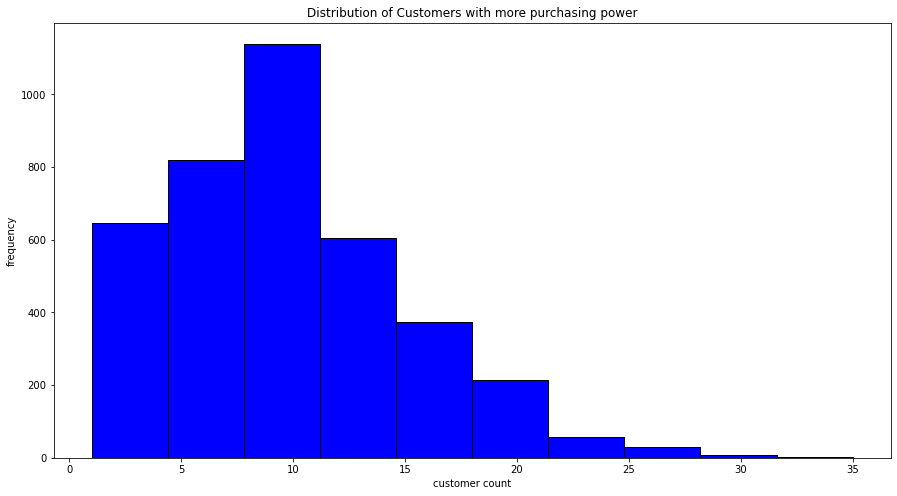

In [18]:

# Plotting the histogram to check summary of the frequency distribution of the member number in a single column
plt.figure(figsize =(15,8))
# Plotting the histogram
plt.hist(Clean_data['Member_number'].value_counts(),bins =10, color ='blue',edgecolor ='black')

# Adding labels and title
plt.xlabel('customer count')
plt.ylabel('frequency')
plt.title('Distribution of Customers with more purchasing power')

#  Display the plot
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


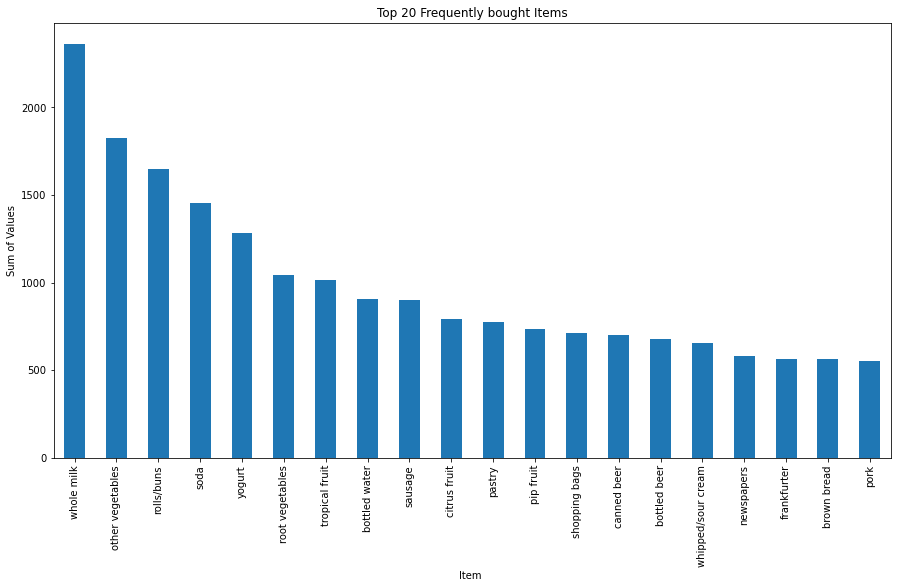

In [19]:
# Grouping by a specific column and calculating the sum of another column
group_items = Clean_data.groupby('itemDescription')

# Sorting the groups based on the size of values in descending order,Selecting the top 20 groups
sizeitem = group_items.size().sort_values(ascending = False).head(20).plot.bar(figsize=(15,8))

print(sizeitem)

# Adding labels and title
plt.xlabel('Item ')
plt.ylabel('Sum of Values')
plt.title('Top 20 Frequently bought Items')

# Display the plot
plt.show()

The 20 most Frequently Purchased Items are Milk, Vegetable, rolls/buns,soda,yoghurt, root vegetables,tropical fruit,bottled water, susage,citrus fruit ,pastry, pip fruit,shopping bags,carned beer,bottled beer,whipped/sour cream, newspaper,trankturter, brown bread pork.

AxesSubplot(0.125,0.125;0.775x0.755)


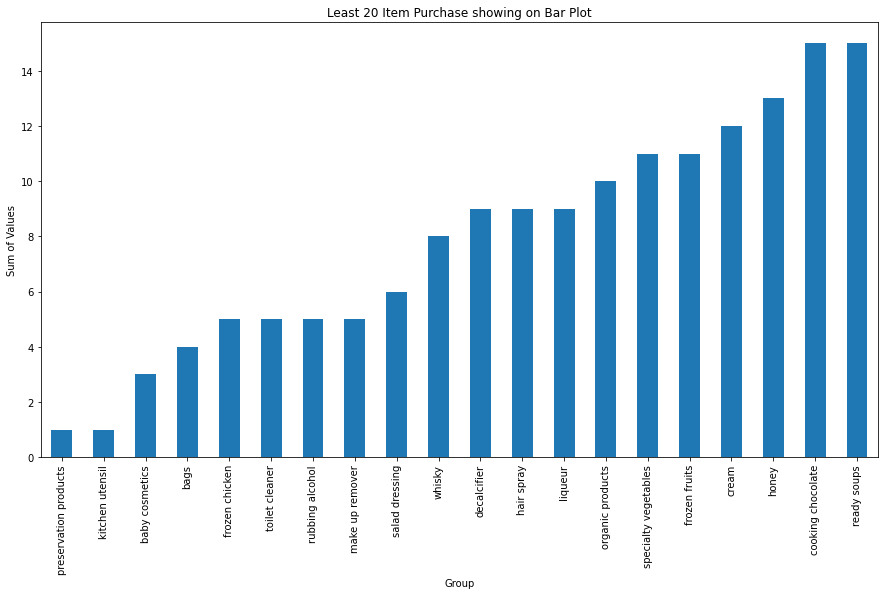

In [20]:
# Grouping by a specific column and calculating the sum of another column
group_items = Clean_data.groupby('itemDescription')

# Sorting the groups based on the size of values in descending order,Selecting the top 20 groups
Leastitem = group_items.size().sort_values(ascending = True).head(20).plot.bar(figsize=(15,8))

print(Leastitem)

# Adding labels and title
Leastitem.plot(kind='bar')
plt.xlabel('Group')
plt.ylabel('Sum of Values')
plt.title('Least 20 Item Purchase showing on Bar Plot')

# Display the plot
plt.show()

The  blo Purchased Items are

<AxesSubplot:xlabel='itemDescription', ylabel='Count'>

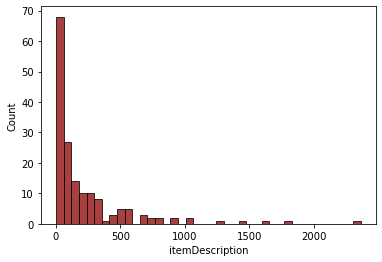

In [21]:
#For numeric variables, create histograms, box plots, and summary statistics.
(sns.histplot(Clean_data['itemDescription'].value_counts(),kde =False,color = 'darkred',bins = 40))

In [22]:
#Let's visualize the columns by plotting the charts
# plt.figure(figsize =(20, 15))
# sns.countplot(x = 'itemDescription',hue='Member_number' ,data = Clean_data, palette = 'Blues_r')

Observation From the EDA -

### PERFORMING TRANSACTIONAL ENCODING


Transaction encoding is the process of converting transactional data into a binary matrix format where rows represent transactions and columns represent unique items.
Each cell in the matrix indicates whether a particular item was present (1) or absent (0) in a transaction. 

In [23]:
#print(f'see the transactional coding for each member {Basket}')
#  Grouping the DataFrame by 'Member_number' and 'itemDescription',size method is applied to count the occurrences of each item in each transaction,unstack method  was use to pivot the data, creating a matrix,fillna(0) method fills the missing values with zeros.

Basket = Clean_data.groupby(['Member_number','itemDescription']).size().unstack().fillna(0)

## Transaction Encoding by using applymap method to convert counts to binary values (1 if the item was present, 0 otherwise). 
Basket= Basket.applymap(lambda x: 1 if x > 0 else 0)
Basket




itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
plt.figure(figsize=(13,7))
sns.heatmap(Clean_data,annot=True)

TypeError: float() argument must be a string or a number, not 'Timestamp'

<Figure size 936x504 with 0 Axes>

## USE APRIORI ALGORITHM

The Apriori algorithm is a commonly used algorithm for association rule mining. It uses a breadth-first search strategy to discover frequent itemsets and generate association rules efficiently. It uses the frequent itemset to generate the Association rule and it is based on the concept that subset of a frequent item set must also be a frequent item itself, So what exactly is frequent

Frequent Itemset is an Item whose support values is greater than a threshold Value.

This Apriori Operate Using three metrics Namely Supoort,Confidence and Lift.


Note : For this Project the Minimum Support was set to 0.02

In [35]:
# Import the required libraries
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets.(min_support represents the minimum support threshold for an itemset to be considered frequent)
frequent_items = apriori(Basket,min_support = 0.02, use_colnames=True)
frequent_items

c:\Users\BUNMI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.078502,(UHT-milk)
1,0.031042,(baking powder)
2,0.119548,(beef)
3,0.079785,(berries)
4,0.062083,(beverages)
...,...,...
889,0.027963,"(whole milk, other vegetables, soda, yogurt)"
890,0.021293,"(whole milk, other vegetables, tropical fruit,..."
891,0.021036,"(sausage, whole milk, soda, rolls/buns)"
892,0.022832,"(sausage, whole milk, rolls/buns, yogurt)"


Since the Set support in this project is 0.02 ,The Apriori filters 894 susbset of the items that are most frequent base on the set min support.

To better understand filter the right Items we are looking for,there is need to further set higher threshold for both Confidence & Support ,This helps improve the performance of the Algorithm.

In [46]:
# Drilling down the frequent items by selecting out items that has it's Support Higher than 0.2,This provide only 9 most frequently purchased Item having whole milk,other Vegetable, rolls/bun, Soda having the highest support.

Top_freq = frequent_items[(frequent_items['support'] > 0.2)]
Top_freq


# Check to see the various items that has Frequency greater than the set minimun support threshold of 0.2,Showing few items that are most frequent, this are the most popular Items in the dataset meaning that this items are performing up to 20% in the transaction.

,support,itemsets
6,0.213699,(bottled water)
52,0.376603,(other vegetables)
64,0.349666,(rolls/buns)
65,0.230631,(root vegetables)
68,0.206003,(sausage)
73,0.313494,(soda)
79,0.233710,(tropical fruit)
85,0.458184,(whole milk)
86,0.282966,(yogurt)


In [48]:
# Generate association rules based on the frequent itemsets.

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values(by='confidence', ascending =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2735,"(bottled water, other vegetables, yogurt)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721,0.339688
1088,"(shopping bags, bottled beer)",(whole milk),0.030272,0.458184,0.020010,0.661017,1.442690,0.006140,1.598358,0.316429
2847,"(other vegetables, rolls/buns, yogurt)",(whole milk),0.052335,0.458184,0.034377,0.656863,1.433623,0.010398,1.579008,0.319170
1484,"(canned beer, shopping bags)",(whole milk),0.033607,0.458184,0.022063,0.656489,1.432806,0.006664,1.577287,0.312574
2889,"(other vegetables, soda, yogurt)",(whole milk),0.043099,0.458184,0.027963,0.648810,1.416047,0.008216,1.542799,0.307042
...,...,...,...,...,...,...,...,...,...,...
1719,(whole milk),"(curd, tropical fruit)",0.458184,0.036429,0.020010,0.043673,1.198855,0.003319,1.007575,0.306138
2868,(whole milk),"(other vegetables, root vegetables, yogurt)",0.458184,0.033864,0.020010,0.043673,1.289677,0.004495,1.010257,0.414554
1509,(whole milk),"(other vegetables, chicken)",0.458184,0.038738,0.020010,0.043673,1.127400,0.002261,1.005161,0.208564
1755,(whole milk),"(tropical fruit, domestic eggs)",0.458184,0.034377,0.020010,0.043673,1.270428,0.004259,1.009721,0.392871


In [49]:
# Setting minimum Threshold for Confidence & lift to Identity more patterns in the transactional data. Setting the rules of Confidence to 0.5 and lift above 1.4


rules[(rules['confidence']> 0.5) & (rules['lift'] > 1.45)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
315,(cat food),(other vegetables),0.043869,0.376603,0.024115,0.549708,1.459646,0.007594,1.384426,0.329351
1944,"(root vegetables, newspapers)",(rolls/buns),0.038738,0.349666,0.020010,0.516556,1.477283,0.006465,1.345210,0.336101
2719,"(whole milk, bottled water, soda)",(other vegetables),0.040021,0.376603,0.022063,0.551282,1.463827,0.006991,1.389284,0.330068
2733,"(whole milk, bottled water, yogurt)",(other vegetables),0.040277,0.376603,0.022063,0.547771,1.454503,0.006894,1.378497,0.325594
2735,"(bottled water, other vegetables, yogurt)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721,0.339688
2774,"(sausage, whole milk, other vegetables)",(rolls/buns),0.050282,0.349666,0.026167,0.520408,1.488299,0.008585,1.356015,0.345462
2914,"(sausage, whole milk, soda)",(rolls/buns),0.040021,0.349666,0.021036,0.525641,1.503264,0.007043,1.370973,0.348737
2929,"(sausage, whole milk, yogurt)",(rolls/buns),0.044895,0.349666,0.022832,0.508571,1.454447,0.007134,1.323353,0.327140


## OBSERVATION & FINDING

Having Set a High threshold for lift to (1.45) and Confidence to (0.5),The Result above Apriori prediction:

1. customers who purchase Cat food have higher tendency of buying Other vegatable
2. customers who purchase root vegetable have higher chance of buying rolls/buns
3. customers who purchase whole milk, bottled water, soda have higher chance of buying other vegetables
4. customers who purchase wwhole milk, bottled water, yogurt have higher chance of buying other vegetables
5. customers who purchase bottled water, other vegetables, yogurt have higher chance of buying whole milk
6. customers who purchase sausage, whole milk, other vegetables have higher chance of buying rolls/buns
7. customers who purchase sausage, whole milk, soda have higher chance of buying rolls/buns
7. customers who purchase sausage, whole milk, yogurt have higher chance of buying rolls/buns


In [32]:
# Setting minimum Threshold for Confidence & lift to Identity more patterns in the transactional data. Setting the rules of Confidence to 0.5 and lift above 1.5

rules[(rules['confidence']> 0.5) & (rules['lift'] > 1.5)]

# Sausage,whol

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2914,"(sausage, whole milk, soda)",(rolls/buns),0.040021,0.349666,0.021036,0.525641,1.503264,0.007043,1.370973,0.348737


Tunning the Algorithmn to it's highest efficiency by setting the Highest threshold for lift to (1.5) and Confidence to (0.5),The Result shows that item most frequently purchased together,This means that any customers who purchase sausage, whole milk, soda will definately purchase rolls/buns.